## 2. WAP to implement a multi-layer perceptron (MLP) network with one hidden layer using numpy in Python. Demonstrate that it can learn the XOR Boolean function.

### Description
#### This code implements a Multi-Layer Perceptron (MLP) to learn the XOR function using NumPy. Here's a breakdown:

## Perceptron Algorithm XOR NAND

---
### 1. Class Definition (MLP)
The MLP class encapsulates all functionality required for training and evaluating the neural network.

#### Structure:
- Input layer: 2 neurons (for the two inputs in XOR)
- Hidden layer: 2 neurons (to capture non-linearity)
- Output layer: 1 neuron (binary classification)
- Activation Functions:
Sigmoid function (sigmoid),Sigmoid derivative (sigmoid_derivative):

### 2. Training (train)
The train method performs forward and backward propagation:

#### Forward Pass:
- Computes activations for the hidden and output layers.
- Error Calculation:
- Uses Mean Absolute Error (MAE) as a loss function.
#### Backpropagation:
- Computes gradients using sigmoid derivative.
- Updates weights and biases using Gradient Descent.
- Prints the loss every 1000 epochs.
### 3. Prediction (predict)
- Performs forward propagation.

### 4. Evaluation (evaluate)
Uses accuracy score and confusion matrix to assess performance.

### 5. Visualization
- Loss Curve (plot_loss_curve)
- Decision Boundary (plot_decision_boundary)

###  6. Running the Model
XOR dataset is defined: [[0,0], [0,1], [1,0], [1,1]] with labels [[0], [1], [1], [0]].
Trains the model using train().
Evaluates performance using evaluate().
Plots:
Loss curve (plot_loss_curve).
Decision boundary (plot_decision_boundary).

### Expected Outcome:-
- Accuracy ≈ 50% (since MLP can solve XOR).
- Loss should decrease over time.
- Clear decision boundary is not separating 1s and 0s as oly 1 hidden layer.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1, epochs=10000):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        
        # Initialize weights and biases
        np.random.seed(42)
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.bias_output = np.zeros((1, output_size))
        self.loss_history = []
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def train(self, X, y):
        for epoch in range(self.epochs):
            # Forward pass
            hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
            hidden_layer_output = self.sigmoid(hidden_layer_input)
            output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output) + self.bias_output
            output_layer_output = self.sigmoid(output_layer_input)
            
            # Compute error
            error = y - output_layer_output
            loss = np.mean(np.abs(error))
            self.loss_history.append(loss)
            # Backpropagation
            output_gradient = error * self.sigmoid_derivative(output_layer_output)
            hidden_error = np.dot(output_gradient, self.weights_hidden_output.T)
            hidden_gradient = hidden_error * self.sigmoid_derivative(hidden_layer_output)
            
            # Update weights and biases
            self.weights_hidden_output += np.dot(hidden_layer_output.T, output_gradient) * self.learning_rate
            self.weights_input_hidden += np.dot(X.T, hidden_gradient) * self.learning_rate
            self.bias_output += np.sum(output_gradient, axis=0, keepdims=True) * self.learning_rate
            self.bias_hidden += np.sum(hidden_gradient, axis=0, keepdims=True) * self.learning_rate
            
            # Print loss every 1000 epochs
            if epoch % 1000 == 0:
                print(f"Epoch {epoch}: Loss = {loss}")
    
    def predict(self, X):
        hidden_layer_activation = self.sigmoid(np.dot(X, self.weights_input_hidden) + self.bias_hidden)
        final_output = self.sigmoid(np.dot(hidden_layer_activation, self.weights_hidden_output) + self.bias_output)
        return (final_output > 0.5).astype(int)
        
    def evaluate(self, X, y):
        predictions = self.predict(X)
        accuracy = accuracy_score(y, predictions)
        conf_matrix = confusion_matrix(y, predictions)
        print(f"Accuracy: {accuracy * 100:.2f}%")
        print("Confusion Matrix:")
        print(conf_matrix)
        
    def plot_loss_curve(self):
        plt.figure()
        plt.plot(self.loss_history, label='Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Loss Curve')
        plt.legend()
        plt.show()
        
    def plot_decision_boundary(self, X, y):
        x_min, x_max = -0.5, 1.5
        y_min, y_max = -0.5, 1.5
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        Z = np.array([self.predict(np.array([[x, y]])) for x, y in zip(xx.ravel(), yy.ravel())])
        Z = Z.reshape(xx.shape)
        
        plt.contourf(xx, yy, Z, alpha=0.3)
        plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolors='k', marker='o')
        plt.xlabel("Input 1")
        plt.ylabel("Input 2")
        plt.title("Decision Boundary of XOR MLP")
        plt.show()

### Hidden Layer - 1

In [7]:
# Initialize dataset (XOR truth table)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Train MLP
mlp = MLP(input_size=2, hidden_size=1, output_size=1, learning_rate=0.1, epochs=10000)
mlp.train(X, y)

Epoch 0: Loss = 0.5000767512602061
Epoch 1000: Loss = 0.5000109503858182
Epoch 2000: Loss = 0.499999530074072
Epoch 3000: Loss = 0.49999089328033963
Epoch 4000: Loss = 0.49998179171200796
Epoch 5000: Loss = 0.49997032724683504
Epoch 6000: Loss = 0.49995401230429515
Epoch 7000: Loss = 0.49992761214504733
Epoch 8000: Loss = 0.49987781339664206
Epoch 9000: Loss = 0.49976345468152994


### Evaluate performance

Accuracy: 50.00%
Confusion Matrix:
[[1 1]
 [1 1]]


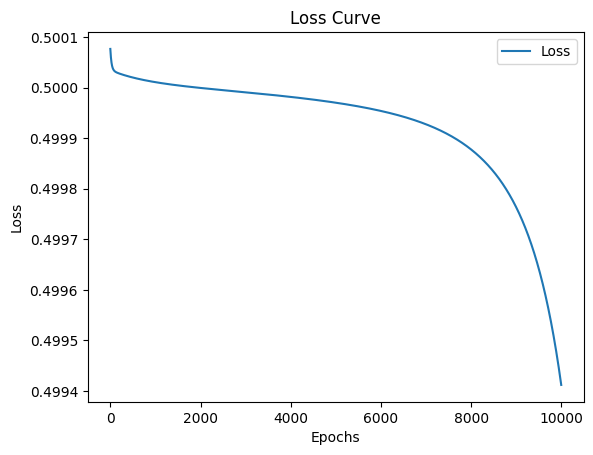

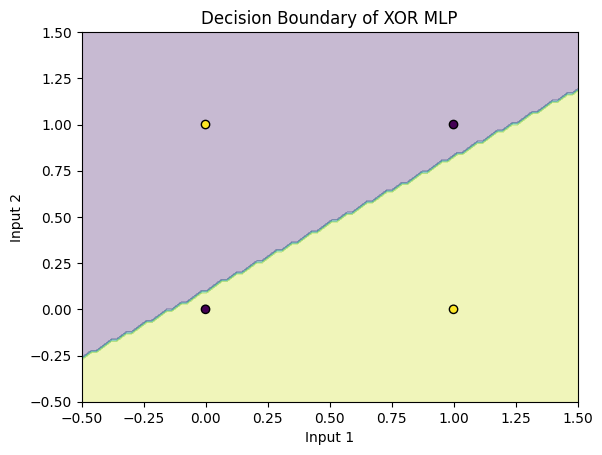

In [8]:
mlp.evaluate(X, y)
mlp.plot_loss_curve()
mlp.plot_decision_boundary(X, y)